In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Step 1: Import the dataset
df = pd.read_csv("./datasets/Real estate.csv")

In [7]:
# Step 2: Clean column names
df.columns = df.columns.str.replace(' ', '_').str.replace(r'[^A-Za-z0-9_]', '', regex=True)

In [8]:
# Step 3: Handle missing values
print("Missing values per column:\n", df.isnull().sum())
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

Missing values per column:
 No                                        0
X1_transaction_date                       0
X2_house_age                              0
X3_distance_to_the_nearest_MRT_station    0
X4_number_of_convenience_stores           0
X5_latitude                               0
X6_longitude                              0
Y_house_price_of_unit_area                0
dtype: int64


C:\Users\mjosh\AppData\Local\Temp\ipykernel_24804\496042159.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\mjosh\AppData\Local\Temp\ipykernel_24804\496042159.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [9]:
# Step 4: Aggregate data to calculate average sale prices by transaction number
average_price_by_transaction = df.groupby('No')['Y_house_price_of_unit_area'].mean().reset_index()
average_price_by_transaction.rename(columns={'Y_house_price_of_unit_area': 'Average_Sale_Price'}, inplace=True)


In [10]:
# Step 5: Identify and handle outliers in 'Y_house_price_of_unit_area'
Q1 = df['Y_house_price_of_unit_area'].quantile(0.25)
Q3 = df['Y_house_price_of_unit_area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Y_house_price_of_unit_area'] >= lower_bound) & (df['Y_house_price_of_unit_area'] <= upper_bound)]


C:\Users\mjosh\AppData\Local\Temp\ipykernel_24804\2219000913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Sale_Price', y='No', data=average_price_by_transaction.sort_values('Average_Sale_Price', ascending=False), palette='viridis')


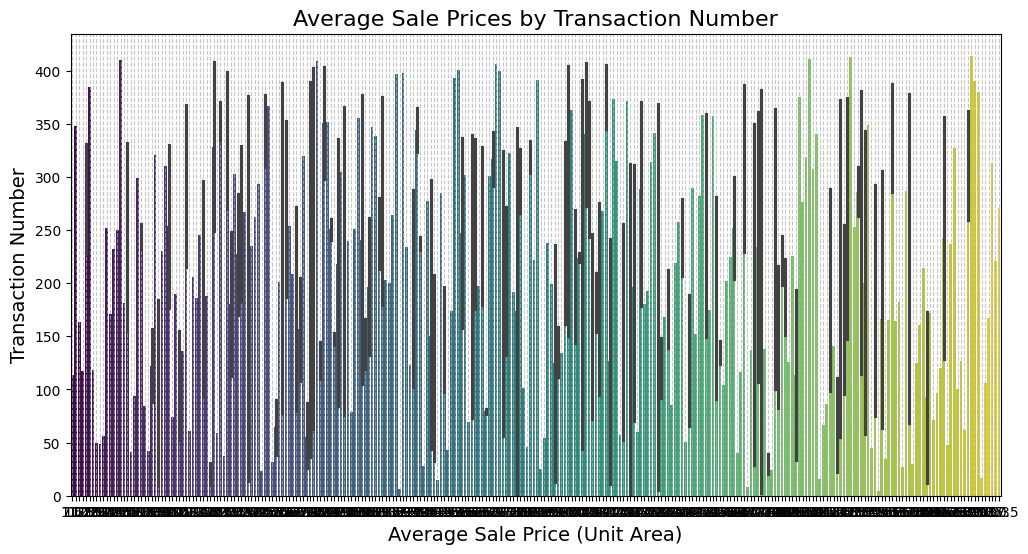

In [11]:
# Step 6: Visualize the average sale prices
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Sale_Price', y='No', data=average_price_by_transaction.sort_values('Average_Sale_Price', ascending=False), palette='viridis')
plt.title("Average Sale Prices by Transaction Number", fontsize=16)
plt.xlabel("Average Sale Price (Unit Area)", fontsize=14)
plt.ylabel("Transaction Number", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

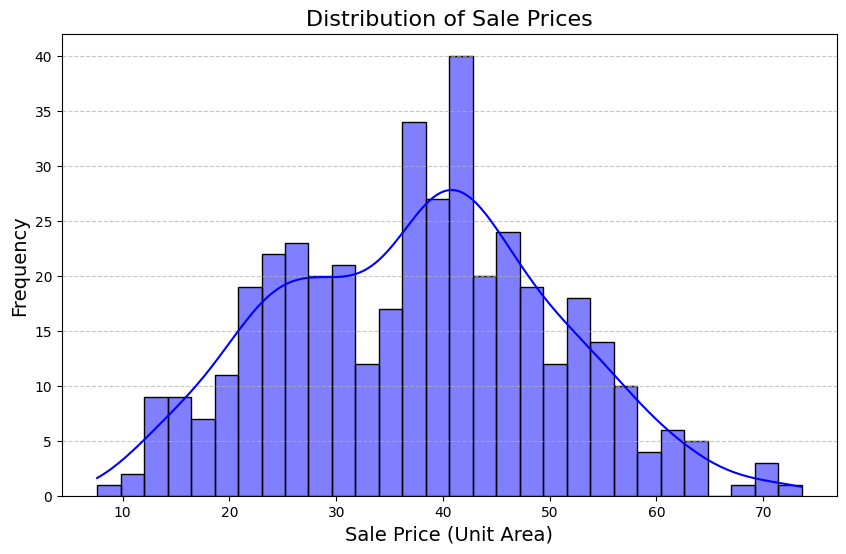

In [12]:
# Step 7: Additional visualizations
# 1. Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Y_house_price_of_unit_area'], bins=30, kde=True, color='blue')
plt.title("Distribution of Sale Prices", fontsize=16)
plt.xlabel("Sale Price (Unit Area)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






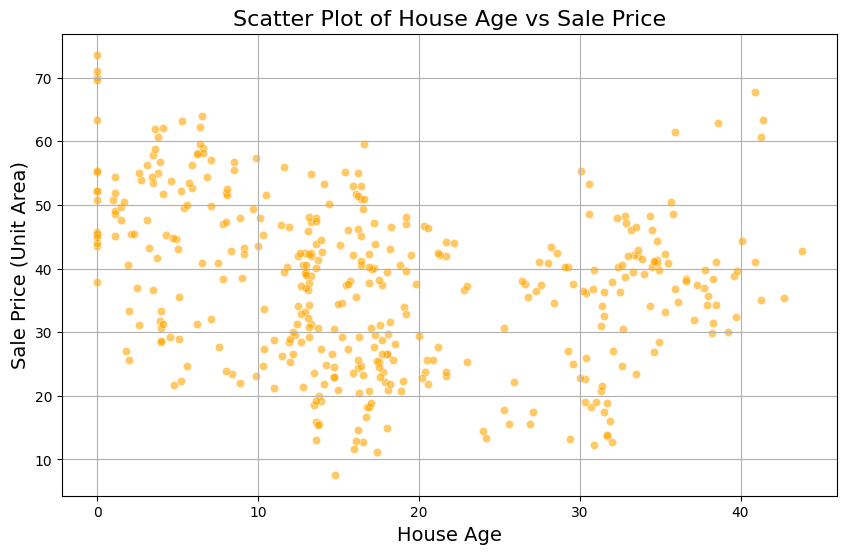

In [13]:
# 2. Scatter plot of House Age vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X2_house_age', y='Y_house_price_of_unit_area', data=df, alpha=0.6, color='orange')
plt.title("Scatter Plot of House Age vs Sale Price", fontsize=16)
plt.xlabel("House Age", fontsize=14)
plt.ylabel("Sale Price (Unit Area)", fontsize=14)
plt.grid()
plt.show()

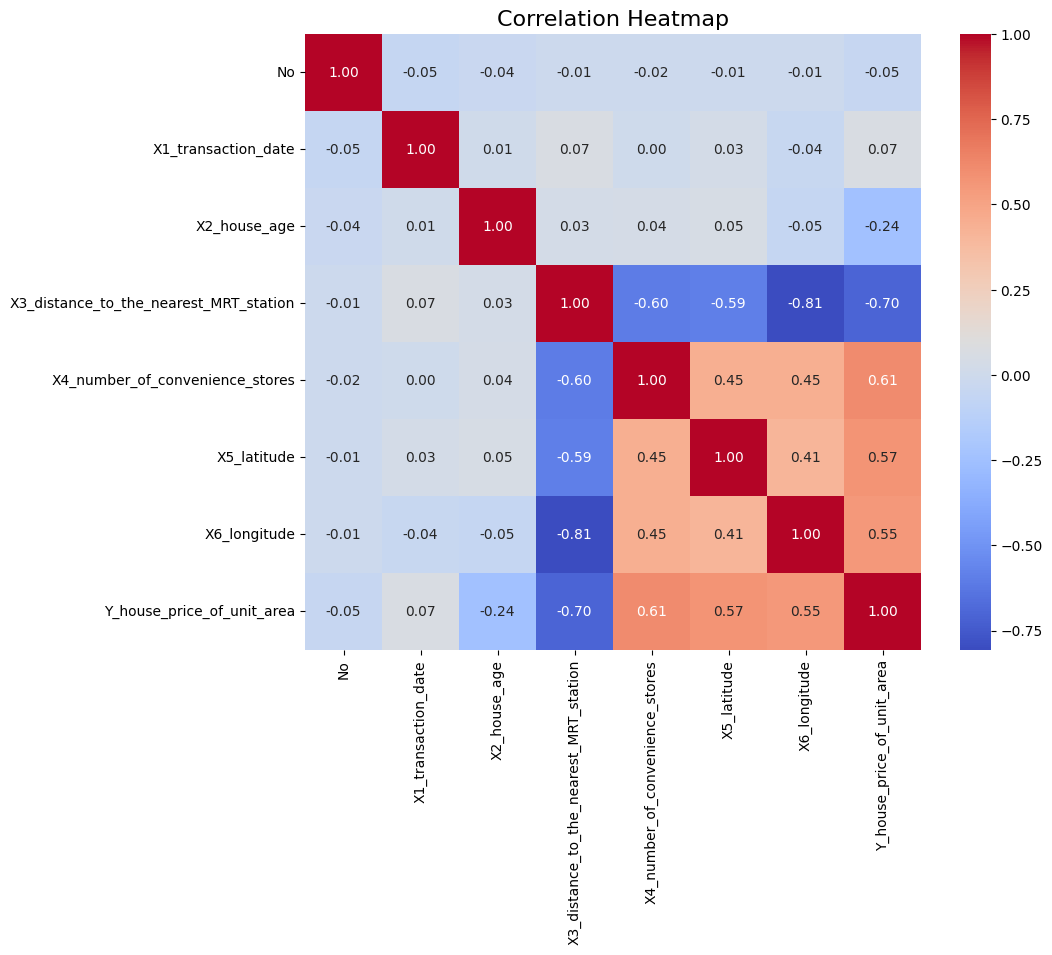

In [14]:

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [17]:
# Step 8: Export the cleaned dataset for future analysis
df.to_csv("C:/Users/mjosh/OneDrive/Documents/Cleaned_RealEstate_Prices.csv", index=False)
print("Cleaned dataset exported as 'Cleaned_RealEstate_Prices.csv'.")


Cleaned dataset exported as 'Cleaned_RealEstate_Prices.csv'.
